In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_excel(r'C:\Users\Admin\Downloads\Redmine.xlsx')
data.head()

,Month,Mode,Point Bugs,Other Bugs,Month.1,Mode.1,WFO_Point Bugs,WFO_Other Bugs
0,Mar,WFH,12,7,Dec,WFO,17,0
1,Mar,WFH,8,4,Dec,WFO,8,4
2,Mar,WFH,10,2,Dec,WFO,2,5
3,Mar,WFH,8,3,Dec,WFO,13,3
4,Apr,WFH,21,1,Jan,WFO,8,5


Called the dataset into the python environment.

In [3]:
data.shape

(14, 8)

The given dataset contain 14 rows and 8 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Month           14 non-null     object
 1   Mode            14 non-null     object
 2   Point Bugs      14 non-null     int64 
 3   Other Bugs      14 non-null     int64 
 4   Month.1         14 non-null     object
 5   Mode.1          14 non-null     object
 6   WFO_Point Bugs  14 non-null     int64 
 7   WFO_Other Bugs  14 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.0+ KB


There are 14 entries 8 columns and the data type are object and integer.

In [6]:
data.isna().sum()

Month             0
Mode              0
Point Bugs        0
Other Bugs        0
Month.1           0
Mode.1            0
WFO_Point Bugs    0
WFO_Other Bugs    0
dtype: int64

There is no null values present in the dataset.

In [7]:
data.dtypes

Month             object
Mode              object
Point Bugs         int64
Other Bugs         int64
Month.1           object
Mode.1            object
WFO_Point Bugs     int64
WFO_Other Bugs     int64
dtype: object

The data types are object and integer.

In [9]:
import matplotlib.pyplot as plt

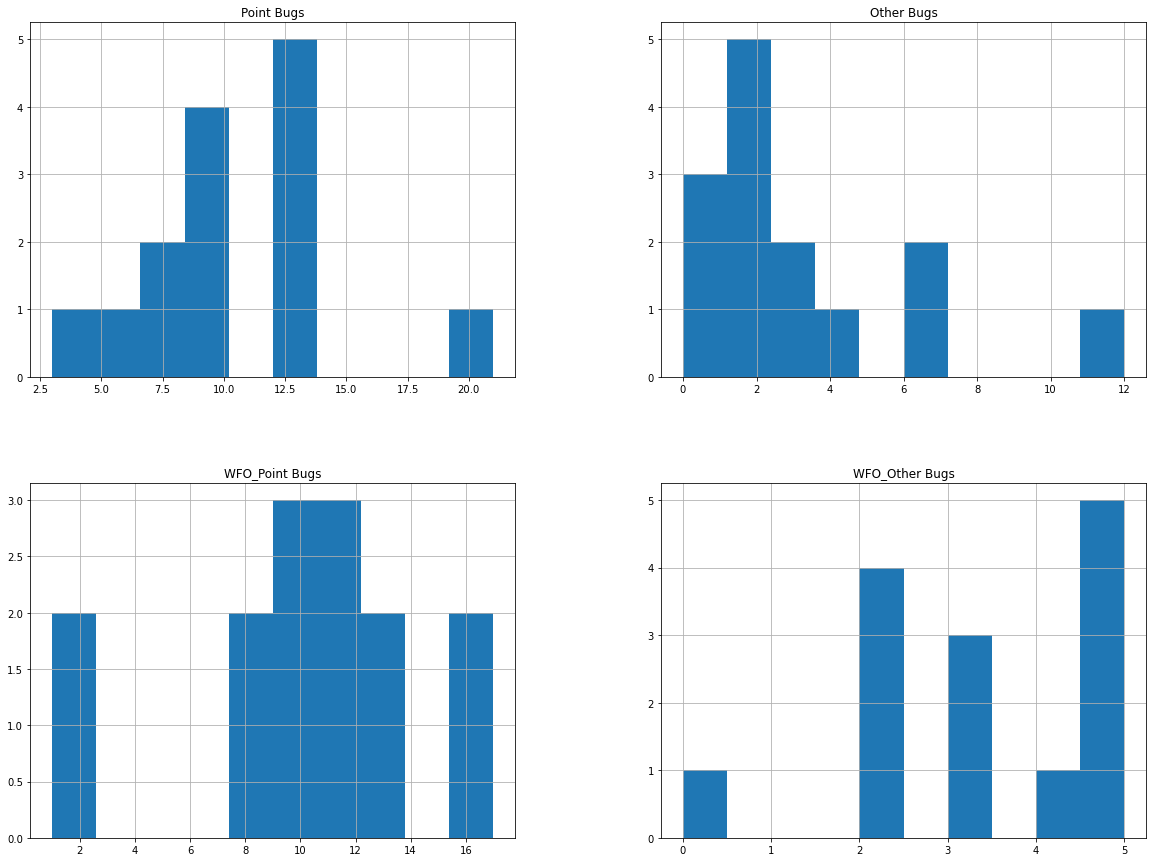

In [10]:
freqgraph=data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(20,15))
plt.show()

Ploted the graph of point bugs and other bugs during the work from home and work from office.

In [11]:
data.columns

Index(['Month', 'Mode', 'Point Bugs', 'Other Bugs', 'Month.1', 'Mode.1',
       'WFO_Point Bugs', 'WFO_Other Bugs'],
      dtype='object')

8 columns are prsent in the dataset namely 'Month', 'Mode', 'Point Bugs', 'Other Bugs', 'Month.1', 'Mode.1',
       'WFO_Point Bugs', 'WFO_Other Bugs'.

In [12]:
data.describe()

,Point Bugs,Other Bugs,WFO_Point Bugs,WFO_Other Bugs
count,14.000000,14.000000,14.00000,14.000000
mean,10.357143,3.357143,10.00000,3.285714
std,4.235512,3.128213,4.62435,1.589803
min,3.000000,0.000000,1.00000,0.000000
25%,8.250000,2.000000,8.25000,2.000000
50%,10.000000,2.000000,10.00000,3.000000
75%,12.000000,3.750000,12.75000,5.000000
max,21.000000,12.000000,17.00000,5.000000


In [ ]:
From this we can identify the mean , standard deviation,minimum and maximum values and quartiles values.

In [13]:
import seaborn as sns

Text(0.5, 1.0, 'Box plot of point bugs in WFH')

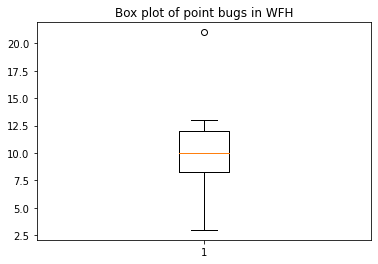

In [14]:
plt.boxplot(data['Point Bugs'])
plt.title("Box plot of point bugs in WFH")

Text(0.5, 1.0, 'Box plot of other bugs in WFH')

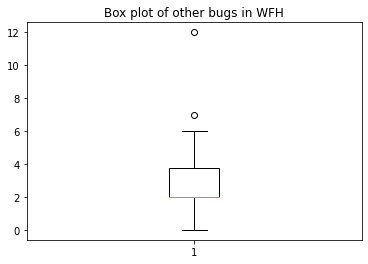

In [15]:
plt.boxplot(data['Other Bugs'])
plt.title("Box plot of other bugs in WFH")

Text(0.5, 1.0, 'Box plot of point bugs in WFO')

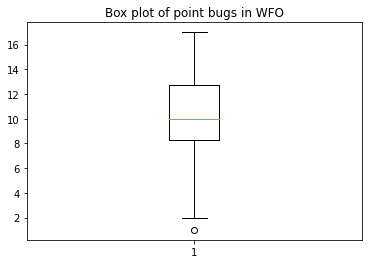

In [16]:
plt.boxplot(data['WFO_Point Bugs'])
plt.title("Box plot of point bugs in WFO")

Text(0.5, 1.0, 'Box plot of other bugs in WFO')

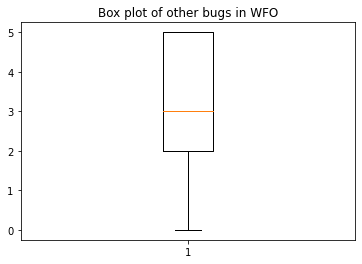

In [17]:
plt.boxplot(data['WFO_Other Bugs'])
plt.title("Box plot of other bugs in WFO")

Drawm the box plot to check whether there is any outliers present.The outliers are present in other bugs during WFH and point bugs during WFO.So we need to find Quartiles.

In [18]:
Q1=np.percentile(data['Other Bugs'],25,interpolation='midpoint')
Q2=np.percentile(data['Other Bugs'],50,interpolation='midpoint')
Q3=np.percentile(data['Other Bugs'],75,interpolation='midpoint')

In [19]:
print(Q1)
print(Q2)
print(Q3)

2.0
2.0
3.5


In [20]:
data['Other Bugs'].median()

2.0

In [22]:
IQR=Q3-Q1
IQR

1.5

This is the inter quartile range.

In [23]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-0.25
5.75


Find out the upper limit and lower limit.

In [27]:
outlier=[]
for x in data['Other Bugs']:
    if ((x>upp_lim)or(x<low_lim)):
      outlier.append(x)        

In [28]:
outlier

[7, 12, 6]

Find out which are the outlies present.

In [29]:
ind1=data['Other Bugs']>upp_lim
data.loc[ind1].index

Int64Index([0, 5, 7], dtype='int64')

In [ ]:
Identified the index value of outliers.

In [30]:
data.drop([0, 5, 7],inplace=True)

In [ ]:
Droped the outliers.

Text(0.5, 1.0, 'Box plot of other bugs in WFH')

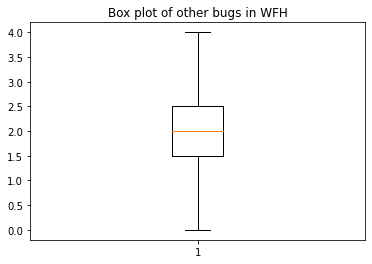

In [31]:
plt.boxplot(data['Other Bugs'])
plt.title('Box plot of other bugs in WFH')

Again plot the box plot. Now there is no outliers.

In [32]:
#The entier process is repeated for point bugs during WFO
Q1=np.percentile(data['WFO_Point Bugs'],25,interpolation='midpoint')
Q2=np.percentile(data['WFO_Point Bugs'],50,interpolation='midpoint')
Q3=np.percentile(data['WFO_Point Bugs'],75,interpolation='midpoint')

In [33]:
print(Q1)
print(Q2)
print(Q3)

8.0
9.0
11.5


In [34]:
data['WFO_Point Bugs'].median()

9.0

In [35]:
IQR=Q3-Q1
IQR

3.5

In [36]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.75
16.75


In [37]:
outlier=[]
for x in data['WFO_Point Bugs']:
    if ((x>upp_lim)or(x<low_lim)):
      outlier.append(x)  

In [38]:
outlier

[2, 1, 17]

In [39]:
ind1=data['WFO_Point Bugs']>upp_lim
data.loc[ind1].index

Int64Index([12], dtype='int64')

In [40]:
data.drop([12],inplace=True)

Text(0.5, 1.0, 'Box plot of point bugs in WFO')

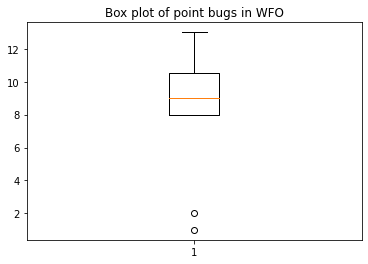

In [41]:
plt.boxplot(data['WFO_Point Bugs'])
plt.title('Box plot of point bugs in WFO')

checking whether there is any difference in point bugs when developers WFH & WFO.Here the sample size is less than 30 so we use t test.

the null and alternative hypothesis are:

H0:the point bugs are same when developers work from home and from office. 

H1:the point bugs are different when developers work from home and from office.

In [42]:
x1=data[data['Mode']=='WFH']['Point Bugs']
x1

1      8
2     10
3      8
4     21
6     12
8     13
9     12
10     9
11    10
13     9
Name: Point Bugs, dtype: int64

In [46]:
x2=data[data['Mode.1']=='WFO']['WFO_Point Bugs']
x2

1      8
2      2
3     13
4      8
6      9
8      9
9     11
10     1
11    12
13     9
Name: WFO_Point Bugs, dtype: int64

In [47]:
alpha=0.05

In [48]:
from scipy import stats

In [51]:
t_value,p_value=stats.ttest_ind(x1,x2)
print("p value is ",p_value)
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
        print("Fail to reject Null Hypothesis")


p value is  0.10106566633934844
Fail to reject Null Hypothesis


Here we fail to reject the null hypothesis.Therefore the point bugs are same when the deveolpers work from home and office.